# Problem Statement :

An education company named X Education sells online courses to industry professionals. On any given day, many
professionals who are interested in the courses land on their website and browse for courses.
The company markets its courses on several websites and search engines like Google. Once these people land on
the website, they might browse the courses or 􀂦ll up a form for the course or watch some videos. When these
people 􀂦ll up a form providing their email address or phone number, they are classi􀂦ed to be a lead. Moreover, the
company also gets leads through past referrals. Once these leads are acquired, employees from the sales team
start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not.
The typical lead conversion rate at X education is around 30%.
There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers
from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about
the product, constantly communicating etc. ) in order to get a higher lead conversion.
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to
convert into paying customers. The company requires you to build a model wherein you need to assign a lead
score to each of the leads such that the customers with higher lead score have a higher conversion chance and
the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark
of the target lead conversion rate to be around 80%.

In [59]:
#Importing important Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import time, warnings
import datetime as dt

Utilized Pandas and NumPy for efficient data manipulation, Matplotlib and Seaborn for visually appealing plots. Warnings suppressed for clean output. Enabled inline plotting for real-time visualization.


In [60]:
#Loading the Dataset with Pandas:
# Reading the csv file from dataset
LSP = pd.read_csv(r'C:\Users\admin\Downloads\Leads.csv')

 Dataset successfully loaded and ready for analysis

In [61]:
LSP

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


Upon conducting a comprehensive data analysis, it has been discerned that the dataset comprises 9240 rows and 37 columns, thereby providing a rich and extensive pool of information for further exploration and insights.

In [63]:
LSP.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#checking for null values
LSP.isnull().sum()


<AxesSubplot:>

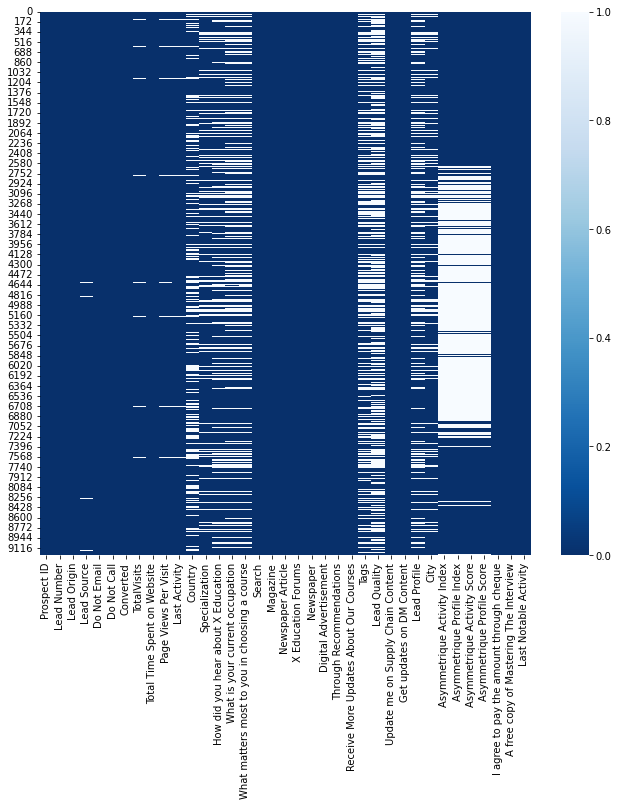

In [44]:
#Checking with the help of heatmap
plt.figure(figsize=(11,10))
sns.heatmap(LSP.isna(), cmap='Blues_r')

The heatmap displays a blue color where no null values are present in the dataset. The white background in the heatmap represents the presence of null values in the corresponding spaces of the dataset.

In [45]:
## Checking the dimension of the dataset
LSP.shape

(9240, 37)

The dataset possesses dimensions of (9240 rows, 37 columns), indicating a comprehensive collection of data points organized in a tabular structure, encompassing a total of 9240 individual records and 37 distinct attributes.

In [46]:
#column counts in the datset
LSP.columns.value_counts().sum()

37

The dataset comprises a total of 37 columns, signifying  attributes encapsulated within its structure.

In [47]:
## loading  all  the  columns  names  here 
LSP.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Certainly, in advanced English:

The command `LSP.columns` allows for the retrieval of all the column names within the dataset, providing a comprehensive overview of the variables encompassed within the data structure.

In [48]:
# To get good overview of the dataset
LSP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

To obtain a comprehensive overview of the dataset, the method `LSP.info()` provides detailed information encompassing various aspects such as data types, non-null counts, and memory usage, offering valuable insights into the dataset's composition and structure.

# Data Cleaning and Preparation

In [50]:
#checking for null values
LSP.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

There are a lot of column which have high number of missing values. Clearly, these columns are not
useful. Since, there are 9000 datapoints in our dataframe, let's eliminate the columns having greater than 3000
missing values as they are of no use to us.

In [51]:
# Drop all the columns in which greater than 3000 missing values are present
for col in LSP.columns:
 if LSP[col].isnull().sum() > 3000:
   LSP.drop(col, 1, inplace=True)

In [52]:
# Check the number of null values again
LSP.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

the variable City won't be of any use in our analysis. So it's best that we drop it.

the variable Country won't be of any use in our analysis. So it's best that we drop it.

In [53]:
LSP.drop(['City'], axis = 1, inplace = True)


In [54]:
# Same goes for the variable 'Country'
LSP.drop(['Country'], axis = 1, inplace = True)

In [56]:
# Let's now check the percentage of missing values in each column
round(100*(LSP.isnull().sum()/len(LSP.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

Now recall that there are a few columns in which there is a level called 'Select' which basically means that the
student had not selected the option for that particular column which is why it shows 'Select'. These values are as
good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it
is present.

In [64]:
# Check the number of null values again
LSP.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

Now recall that there are a few columns in which there is a level called 'Select' which basically means that the
student had not selected the option for that particular column which is why it shows 'Select'. These values are as
good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it
is present.

In [67]:
# Get the value counts of all the columns
for column in LSP:
 print(LSP[column].astype('category').value_counts())
 print('___________________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

In [68]:
LSP['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [69]:
LSP['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [70]:
LSP['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Clearly the levels Lead Pro􀂦le and How did you hear about X Education have a lot of rows which have the value
Select which is of no use to the analysis so it's best that we drop them.

In [71]:
LSP.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1,inplace = True) 

In [75]:
LSP.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
'Update me on Supply Chain Content', 'Get updates on DM Content',
'I agree to pay the amount through cheque'], axis = 1, inplace = True)

Also, the variable What matters most to you in choosing a course has the level Better Career
Prospects 6528 times while the other two levels appear once twice and once respectively. So we should drop
this column as well.

In [76]:
LSP['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [77]:
# Drop the null value rows present in the variable 'What matters most to you in choosin
LSP.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [78]:
# Check the number of null values again
LSP.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Country                                   2461
Specialization                            1438
What is your current occupation           2690
Newspaper                                    0
Tags                                      3353
Lead Quality                              4767
City                                      1420
Asymmetrique Activity Index               4218
Asymmetrique Profile Index                4218
Asymmetrique Activity Score               4218
Asymmetrique Profile Score                4218
A free copy o

Now, there's the column What is your current occupation which has a lot of null values. Now you can
drop the entire row but since we have already lost so many feature variables, we choose not to drop it as it might
turn out to be signi􀂦cant in the analysis. So let's just drop the null rows for the column What is you current
occupation .

In [81]:
LSP = LSP[~pd.isnull(LSP['What is your current occupation'])]

In [82]:
# Check the number of null values again
LSP.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                130
Total Time Spent on Website                  0
Page Views Per Visit                       130
Last Activity                              103
Country                                   1605
Specialization                              18
What is your current occupation              0
Newspaper                                    0
Tags                                       744
Lead Quality                              2077
City                                         0
Asymmetrique Activity Index               2968
Asymmetrique Profile Index                2968
Asymmetrique Activity Score               2968
Asymmetrique Profile Score                2968
A free copy o

Since now the number of null values present in the columns are quite small we can simply drop the rows in which
these null values are present.

In [83]:
# Drop the null value rows in the column 'TotalVisits'
LSP = LSP[~pd.isnull(LSP['TotalVisits'])]

In [84]:
# Check the null values again
LSP.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 29
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Country                                   1475
Specialization                              18
What is your current occupation              0
Newspaper                                    0
Tags                                       731
Lead Quality                              2046
City                                         0
Asymmetrique Activity Index               2918
Asymmetrique Profile Index                2918
Asymmetrique Activity Score               2918
Asymmetrique Profile Score                2918
A free copy o

In [85]:
# Drop the null values rows in the column 'Lead Source
LSP = LSP[~pd.isnull(LSP['Lead Source'])]

In [86]:
# Check the number of null values again
LSP.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Country                                   1447
Specialization                              18
What is your current occupation              0
Newspaper                                    0
Tags                                       725
Lead Quality                              2037
City                                         0
Asymmetrique Activity Index               2903
Asymmetrique Profile Index                2903
Asymmetrique Activity Score               2903
Asymmetrique Profile Score                2903
A free copy o

In [87]:
# Drop the null values rows in the column 'Specializati
LSP= LSP[~pd.isnull(LSP['Specialization'])]

In [88]:
# Check the number of null values again
LSP.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Country                                   1447
Specialization                               0
What is your current occupation              0
Newspaper                                    0
Tags                                       707
Lead Quality                              2019
City                                         0
Asymmetrique Activity Index               2889
Asymmetrique Profile Index                2889
Asymmetrique Activity Score               2889
Asymmetrique Profile Score                2889
A free copy o

Now our data doesn't have any null values. Let's now check the percentage of rows that we have retained

In [90]:
print(len(LSP.index))
print(len(LSP.index)/9240)

6373
0.6897186147186147


We still have around 69% of the rows which seems good enough.

In [91]:
# Let's look at the dataset again
LSP.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Newspaper,Tags,Lead Quality,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,...,No,Interested in other courses,Low in Relevance,Select,02.Medium,02.Medium,15.0,15.0,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,...,No,Ringing,NaN,Select,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,...,No,Will revert after reading the email,Might be,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,...,No,Ringing,Not Sure,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,...,No,Will revert after reading the email,Might be,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


Now, clearly the variables Prospect ID and Lead Number won't be of any use in the analysis, so it's best that
we drop these two variables.

In [92]:
LSP.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [93]:
LSP.head()


,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,...,Newspaper,Tags,Lead Quality,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,...,No,Interested in other courses,Low in Relevance,Select,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Select,...,No,Ringing,NaN,Select,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,...,No,Will revert after reading the email,Might be,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,...,No,Ringing,Not Sure,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Select,...,No,Will revert after reading the email,Might be,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


<AxesSubplot:>

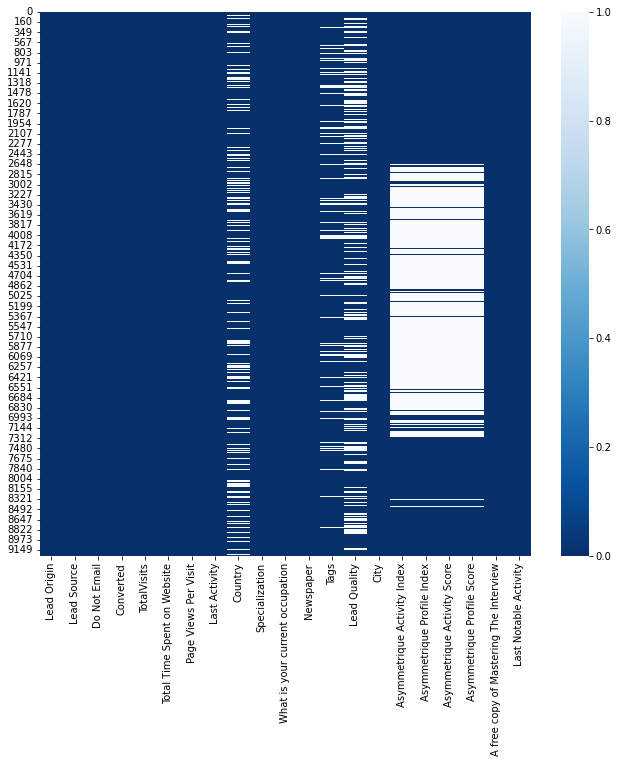

In [94]:
#Checking with the help of heatmap
plt.figure(figsize=(11,10))
sns.heatmap(LSP.isna(), cmap='Blues_r')